In [64]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# Load the dataset
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.499917,0.585798,-5.564395e-07,0.533523,0.490479,0.016785,0.550122,0.397547,0.009733,0.534762,...,0.413360,0.335531,-0.084828,0.407418,0.382243,-0.072221,0.429678,0.412610,-0.062244,0
1,0.504659,0.583602,-5.267302e-07,0.546678,0.491761,0.008846,0.564946,0.393151,-0.001567,0.543499,...,0.410358,0.335302,-0.083208,0.407459,0.379016,-0.069956,0.429181,0.408344,-0.059177,0
2,0.469227,0.596379,-8.727365e-07,0.421442,0.483559,0.008459,0.425860,0.382892,0.005598,0.435126,...,0.479546,0.346447,-0.077377,0.458274,0.404652,-0.067222,0.477304,0.439887,-0.052456,0
3,0.458044,0.581545,-9.305611e-07,0.399066,0.523640,-0.011439,0.355471,0.420555,-0.014318,0.338676,...,0.511785,0.322368,-0.040324,0.489559,0.390157,-0.025141,0.491943,0.433063,-0.005408,0
4,0.479898,0.587649,-8.189567e-07,0.404275,0.556923,-0.031846,0.330899,0.480107,-0.048937,0.289518,...,0.523143,0.289753,-0.055655,0.511612,0.358934,-0.043477,0.502132,0.411338,-0.024788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,0.527578,0.830787,3.939421e-08,0.468458,0.804614,-0.044289,0.408290,0.735406,-0.074114,0.349064,...,0.624642,0.617780,-0.089905,0.602800,0.675921,-0.077791,0.583377,0.695202,-0.061899,9
1095,0.521824,0.836297,6.409510e-08,0.462833,0.812284,-0.041871,0.401294,0.742253,-0.070573,0.343223,...,0.619425,0.614756,-0.089807,0.598323,0.670170,-0.076876,0.576381,0.694755,-0.059697,9
1096,0.558692,0.786823,7.897242e-08,0.498234,0.774933,-0.035904,0.434871,0.712765,-0.060235,0.378197,...,0.634300,0.561767,-0.086867,0.624533,0.617613,-0.075051,0.602484,0.647004,-0.059583,9
1097,0.608855,0.760613,9.198260e-08,0.558524,0.750962,-0.040852,0.503863,0.700985,-0.068265,0.453115,...,0.679054,0.537112,-0.078493,0.670763,0.591449,-0.069264,0.646312,0.620861,-0.054739,9


In [66]:
# Rename the output column
df = df.rename(columns={63: 'Output'})

# Extract features and labels
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1099, 63)
Labels shape = (1099,)


In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [68]:
unique_classes = df['Output'].unique()
NUM_CLASSES = len(unique_classes)
print("Number of classes:", NUM_CLASSES)


Number of classes: 11


In [69]:
# Create a sequential model
model = Sequential()

# Add dense layers
model.add(Dense(64, activation='relu', input_dim=63))  # Input dimension should match the number of features (63 in your case)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))  # Change NUM_CLASSES to the number of classes in your dataset

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [70]:

import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
28/28 [==============================] - 1s 11ms/step - loss: 2.3651 - accuracy: 0.1524 - val_loss: 2.3121 - val_accuracy: 0.1909
Epoch 2/20
28/28 [==============================] - 0s 4ms/step - loss: 2.2256 - accuracy: 0.3356 - val_loss: 2.1175 - val_accuracy: 0.4545
Epoch 3/20
28/28 [==============================] - 0s 3ms/step - loss: 1.9766 - accuracy: 0.4289 - val_loss: 1.8229 - val_accuracy: 0.4455
Epoch 4/20
28/28 [==============================] - 0s 3ms/step - loss: 1.6012 - accuracy: 0.6166 - val_loss: 1.3954 - val_accuracy: 0.5773
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 1.2431 - accuracy: 0.6667 - val_loss: 1.0557 - val_accuracy: 0.7773
Epoch 6/20
28/28 [==============================] - 0s 3ms/step - loss: 0.9502 - accuracy: 0.7793 - val_loss: 0.8414 - val_accuracy: 0.8136
Epoch 7/20
28/28 [==============================] - 0s 4ms/step - loss: 0.7804 - accuracy: 0.7986 - val_loss: 0.6787 - val_accuracy: 0.8409
Epoch 8/20
28/28 [=

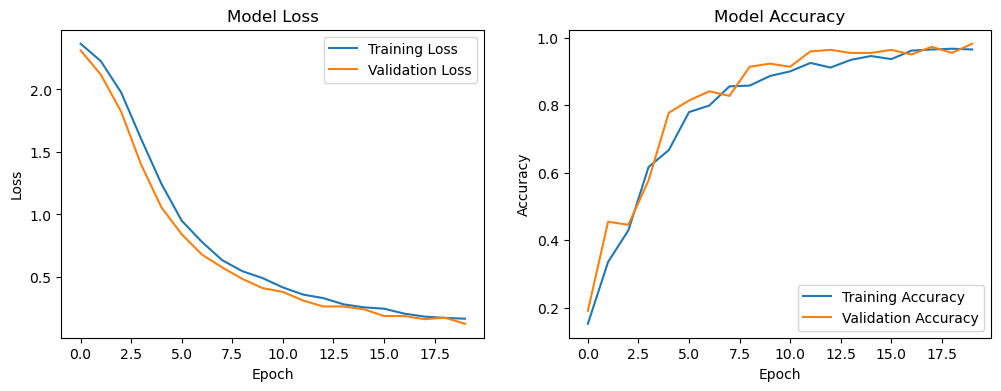

In [71]:
# Visualize the training history (loss and accuracy)
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

7/7 [==============================] - 0s 1ms/step


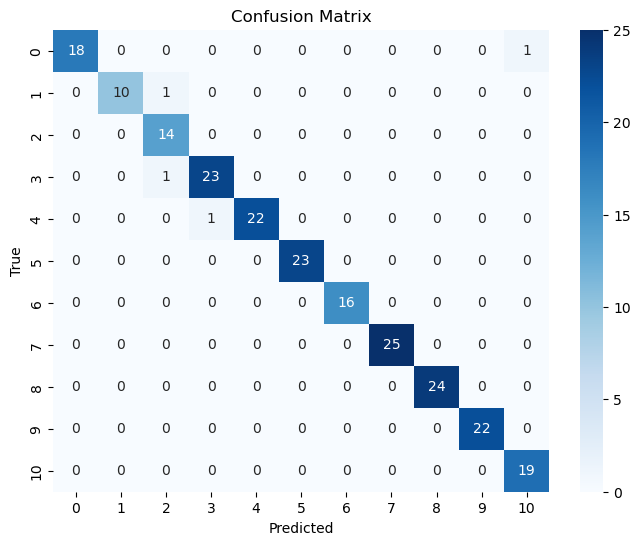

In [72]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [73]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")

# Save the model
model.save('cnn_model.h5')

7/7 - 0s - loss: 0.1266 - accuracy: 0.9818 - 21ms/epoch - 3ms/step
Test accuracy: 0.9818181991577148


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]

# Rename the output column
df = df.rename(columns={63: 'Output'})

# Split the data into features (X) and labels (Y)
X = df.iloc[:, :-1]
Y = df['Output']

# Get the list of feature names as strings
feature_names = [str(col) for col in X.columns]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)



In [2]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Train the model
decision_tree.fit(x_train, y_train)


DecisionTreeClassifier(random_state=0)

In [3]:
# Make predictions
y_pred = decision_tree.predict(x_test)

# Calculate accuracy, F1-score, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8318181818181818
F1 Score: 0.8318181818181818
Recall: 0.8318181818181818
Precision: 0.8318181818181818
Confusion Matrix:
[[14  1  0  0  0  0  0  1  0  1  2]
 [ 0  8  0  0  0  0  0  0  0  3  0]
 [ 0  0 13  0  0  1  0  0  0  0  0]
 [ 0  0  3 19  0  2  0  0  0  0  0]
 [ 0  0  1  0 19  3  0  0  0  0  0]
 [ 0  0  0  4  3 16  0  0  0  0  0]
 [ 1  0  0  0  0  0 12  2  0  0  1]
 [ 0  0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0  1 23  0  0]
 [ 0  1  1  0  0  0  1  0  0 19  0]
 [ 2  0  0  0  0  0  2  0  0  0 15]]


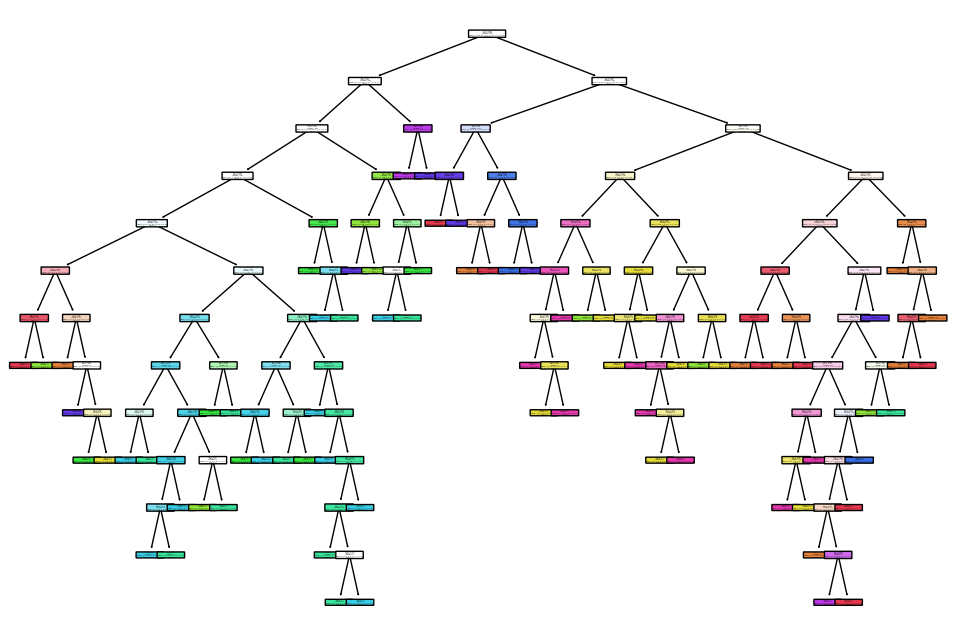

In [6]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Train the model
decision_tree.fit(x_train, y_train)

# Get unique class labels as strings
class_names = [str(label) for label in df['Output'].unique()]

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()


In [7]:
# Make predictions
y_pred = decision_tree.predict(x_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.8318181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.80      0.73      0.76        11
           2       0.72      0.93      0.81        14
           3       0.83      0.79      0.81        24
           4       0.86      0.83      0.84        23
           5       0.73      0.70      0.71        23
           6       0.80      0.75      0.77        16
           7       0.86      1.00      0.93        25
           8       1.00      0.96      0.98        24
           9       0.83      0.86      0.84        22
          10       0.83      0.79      0.81        19

    accuracy                           0.83       220
   macro avg       0.83      0.82      0.82       220
weighted avg       0.83      0.83      0.83       220



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import joblib  # Import the joblib library

# ... (the rest of your code)

# Train the model
decision_tree.fit(x_train, y_train)

# Save the trained model to a file
model_filename = 'decision_tree_model.pkl'  # Choose a file name
joblib.dump(decision_tree, model_filename)

# ... (the rest of your code)

# Later, if you want to load the model for prediction:
# Load the saved model
#loaded_model = joblib.load(model_filename)


['decision_tree_model.pkl']